In [1]:
import pandas as pd
import os
import requests
from acquire import get_items,get_sales, get_stores, composite_sales_data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [2]:
df = composite_sales_data(get_sales(), get_items(), get_stores())

In [3]:
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [4]:
df.sale_date = pd.to_datetime(df.sale_date)
df = df.set_index('sale_date').sort_index()
df['month'] = df.index.month
df['day_of_week'] = df.index.day_name()
df['sales_total'] = df.sale_amount * df.item_price

In [5]:
df

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,1,Tuesday,294.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 00:00:00+00:00,34,21.0,619014,9,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,735 SW Military Dr,San Antonio,TX,78221,12,Sunday,87.57
2017-12-31 00:00:00+00:00,34,32.0,620840,10,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,8503 NW Military Hwy,San Antonio,TX,78231,12,Sunday,133.44
2017-12-31 00:00:00+00:00,35,55.0,622666,1,Natures Way,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,12,Sunday,285.45


In [6]:
df = df.groupby(['sale_date']).sales_total.sum().reset_index()
df

,sale_date,sales_total
0,2013-01-01 00:00:00+00:00,73844.01
1,2013-01-02 00:00:00+00:00,73570.58
2,2013-01-03 00:00:00+00:00,78169.48
3,2013-01-04 00:00:00+00:00,84467.73
4,2013-01-05 00:00:00+00:00,87621.85
...,...,...
1821,2017-12-27 00:00:00+00:00,109151.15
1822,2017-12-28 00:00:00+00:00,117377.49
1823,2017-12-29 00:00:00+00:00,126541.84
1824,2017-12-30 00:00:00+00:00,134903.07


In [7]:
train_size = .80
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

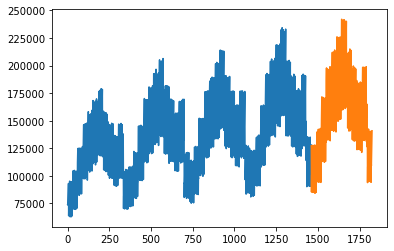

In [8]:
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

In [9]:
train = train.set_index('sale_date')

In [11]:
s=train.sales_total
s.head()

0    73844.01
1    73570.58
2    78169.48
3    84467.73
4    87621.85
Name: sales_total, dtype: float64

In [13]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [15]:
plt.rc('figure', figsize=(10,7))
plt.style.use('tableau-colorblind10')
plt.rc('font',size=16)
s.resample('D').mean().plot(alpha=.5, label='Daily')
s.resample('W').mean().plot(alpha=.8, label='Weekly')
s.resample('M').mean().plot(label='Montly')
s.resample('Y').mean().plot(label='Yearly')
plt.legend()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [ ]:
s.plot(alpha=.2, label='Hourly')
s.resample('M').mean().rolling(3).mean().plot(alpha=.5, label='Quarterly')
s.resample('M').mean().rolling(6).mean().plot(alpha=8, label='Semi-Annually')
plt.legend()

In [ ]:
s.resample('M').mean().diff().plot(title='Average Month Change in Total Sales')

In [ ]:
s.groupby([s.index.year, s.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

In [ ]:
plt.scatter(s, s.shift(7))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 7}$')
plt.title('Lag plot with lag=7')

In [ ]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

In [ ]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('M').mean())

In [ ]:
week = s.resample('W').mean()
result = sm.tsa.seasonal_decompose(week)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()
result.plot()